# Multiple Linear Regression - Economic Datasets

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [91]:
df_index = pd.read_csv('economic-index.csv')

In [92]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2015,6,2.06,6.91,244.81
1,2015,8,2.93,6.33,89.55
2,2018,4,2.60,6.82,142.23
3,2017,3,2.40,6.68,126.55
4,2019,9,1.73,5.79,356.92


In [93]:
# Drop unecesary columns
df_index.drop(columns = ["year", "month"], axis=1, inplace=True)

In [94]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.06,6.91,244.81
1,2.93,6.33,89.55
2,2.60,6.82,142.23
3,2.40,6.68,126.55
4,1.73,5.79,356.92


In [95]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [96]:
## Lets do some visualization
import seaborn as sns

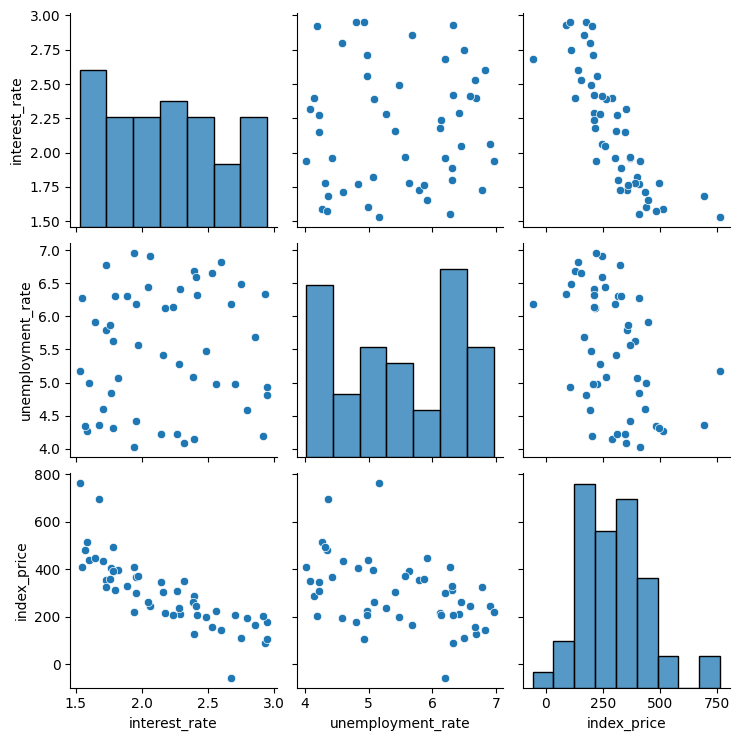

In [97]:
sns.pairplot(df_index)

In [98]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.063267,-0.816506
unemployment_rate,0.063267,1.000000,-0.440303
index_price,-0.816506,-0.440303,1.000000


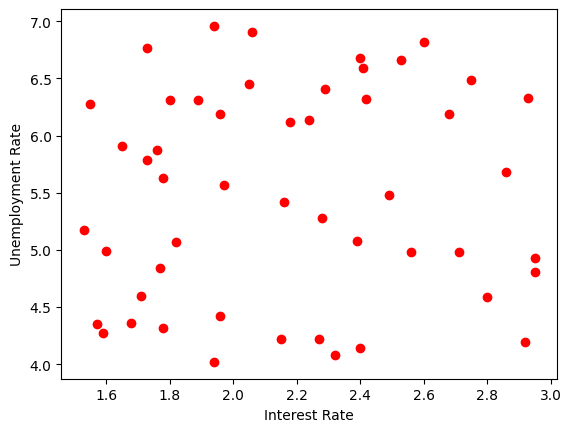

In [99]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")
plt.show()

In [100]:
## getting independent and dependent features
x =df_index.iloc[:,:-1] # independent columns must be in datafreames
y =df_index.iloc[:,-1] # this depndent feature will be in series

In [101]:
x.head()

,interest_rate,unemployment_rate
0,2.06,6.91
1,2.93,6.33
2,2.60,6.82
3,2.40,6.68
4,1.73,5.79


In [102]:
y.head()

0    244.81
1     89.55
2    142.23
3    126.55
4    356.92
Name: index_price, dtype: float64

## Train Test Split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [105]:
X_test.shape

(13, 2)

In [106]:
X_train.shape

(37, 2)

In [107]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

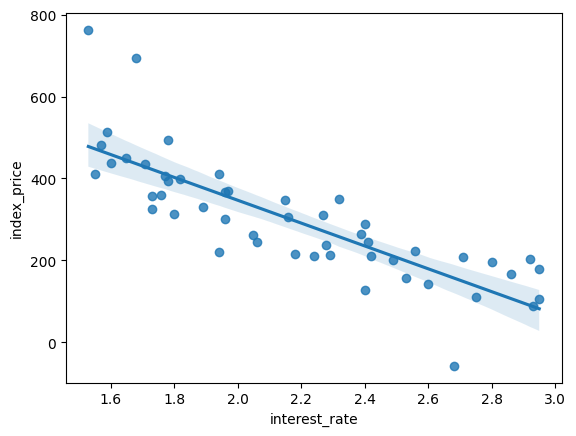

In [108]:
sns.regplot(x = df_index['interest_rate'], y = df_index['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

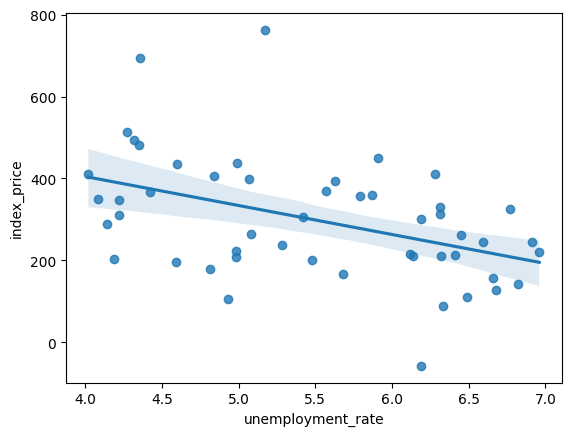

In [109]:
sns.regplot(x = df_index['unemployment_rate'], y = df_index['index_price'])

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
# gets converted to 2d array
X_train

array([[ 1.18832475,  1.13396117],
       [ 0.19376078, -1.2584377 ],
       [ 1.54056616, -1.2900553 ],
       [-0.44856179, -1.04765365],
       [ 0.87752351,  1.48175484],
       [ 1.04328417,  0.81778511],
       [-0.84224337, -0.60500717],
       [ 0.48384194,  1.2393532 ],
       [-0.9251237 ,  1.42905883],
       [-1.19448478, -0.44691914],
       [ 1.56128625,  0.96533394],
       [-1.25664503, -1.12142807],
       [ 1.10544442, -0.45745834],
       [ 0.13160053,  0.7650891 ],
       [-0.49000196,  1.62930367],
       [-1.09088436,  0.52268745],
       [-1.33952536, -0.2572135 ],
       [-0.9251237 ,  0.39621703],
       [-1.21520486, -1.20574169],
       [ 0.46312185,  1.33420601],
       [ 0.50456202,  0.95479474],
       [-0.78008312,  0.94425554],
       [ 0.73248293,  1.31312761],
       [-0.96656387, -0.85794802],
       [-1.29808519,  0.91263793],
       [-0.86296345,  0.48053065],
       [ 1.60272641, -0.51015435],
       [ 1.29192517, -0.86848722],
       [-0.82152329,

In [113]:
X_test

array([[-0.44856179,  0.81778511],
       [ 0.21448086, -0.14128228],
       [ 0.44240177, -0.35206632],
       [ 0.79464318, -0.45745834],
       [-0.73864295, -0.36260552],
       [-0.24136097,  1.57660766],
       [-0.59360237,  0.94425554],
       [-0.42784171,  0.16435458],
       [-0.03416014,  0.00626655],
       [-0.26208105,  1.09180437],
       [ 0.00728003,  0.7440107 ],
       [ 0.29736119, -1.40598653],
       [ 0.23520094,  1.04964756]])

In [114]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [115]:
print("Coefficient or Slope: ", regression.coef_) #this says one unit movement in the x value that is feature weight value there is 19.03 increase or movement in y value
print("Intercept : ", regression.intercept_)

Coefficient or Slope:  [-130.64182466  -59.00875357]
Intercept :  304.54297297297285


In [116]:
## Cross validation with the model that we have created
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, Y_train, scoring='neg_mean_squared_error', cv=3)

In [117]:
validation_score

array([-5585.56079266, -7660.68715548, -4390.32150575])

In [118]:
np.mean(validation_score)

np.float64(-5878.85648463184)

In [119]:
## Do the prediction

In [120]:
y_pred = regression.predict(X_test)

In [121]:
y_pred

array([314.88742408, 284.85969337, 267.52179315, 227.72338455,
       422.4375361 , 243.04115692, 326.37292799, 350.73863568,
       308.6359341 , 274.35570454, 259.68875277, 348.660677  ,
       211.87749882])

### Performance Metrics

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [123]:
mse = mean_squared_error(Y_test, y_pred)
print(mse)
mae = mean_absolute_error(Y_test, y_pred)
print(mae)
rmse = np.sqrt(mse)
print(rmse)

434.09919451447547
13.929948173250997
20.835047264512635


In [124]:
score= r2_score(Y_test, y_pred)
print(score)

0.8769904321448322


In [125]:
#Adjusted r2
1- (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8523885185737986

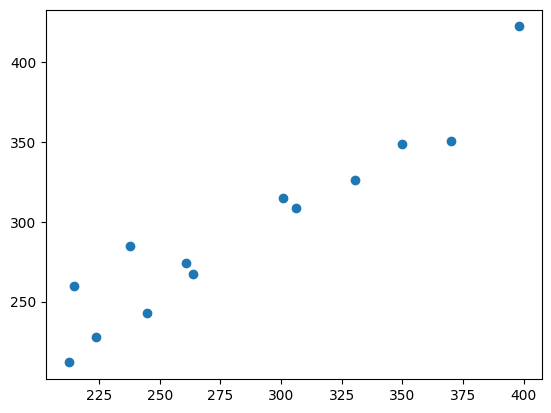

In [126]:
plt.scatter(Y_test, y_pred)

In [127]:
residuals = Y_test - y_pred
print(residuals)

36   -13.907424
47   -47.069693
28    -3.851793
9     -3.993385
13   -24.257536
0      1.768843
44     4.077072
46    19.421364
39    -2.465934
23   -13.625705
24   -44.998753
48     1.119323
17     0.532501
Name: index_price, dtype: float64


<Axes: xlabel='index_price', ylabel='Count'>

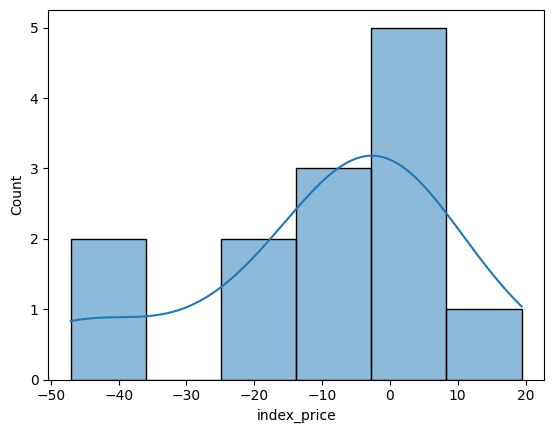

In [128]:
#plot this residuals
sns.histplot(residuals, kde=True)
#If this kind of residuals is plotted with normal distirbution that mean this is uniformly distributed.

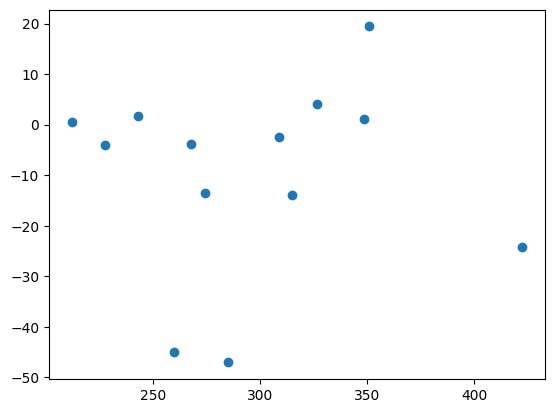

In [129]:
plt.scatter(y_pred, residuals)
#Data is uniformlly distrubuted as we can say it is linear

In [130]:
import statsmodels.api as sm

In [131]:
model = sm.OLS(Y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[ 10.34445111 -19.6832796  -37.02117982 -76.81958843 117.89456313
 -61.50181605  21.82995502  46.19566271   4.09296112 -30.18726843
 -44.85422021  44.11770402 -92.66547415]


In [132]:
print(model.summary())
#both the coefficient in regression and in ols are same, so we can say or model is best fit.

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.187
Model:                            OLS   Adj. R-squared (uncentered):              0.141
Method:                 Least Squares   F-statistic:                              4.029
Date:                Mon, 13 Jan 2025   Prob (F-statistic):                      0.0266
Time:                        16:39:36   Log-Likelihood:                         -265.09
No. Observations:                  37   AIC:                                      534.2
Df Residuals:                      35   BIC:                                      537.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [133]:
regression.predict([[2.06, 6.91]])

array([-372.32967301])

In [134]:
regression.predict(scaler.transform([[2.06, 6.91]]))

C:\Users\lalra\myFolder\Software-Engineering\AIML\IITG\IITG-conda-env\iitgAIMLVenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([243.04115692])